In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cross_validation
import sklearn.linear_model
import sklearn.metrics
import sklearn.dummy
import sklearn.tree

In [3]:
sac = pd.read_csv('Sacramentorealestatetransactions.csv', index_col=0)

train_test_split = sklearn.cross_validation.train_test_split

(train_x, test_x, train_y, test_y) = train_test_split(sac,
                                                      sac.price,
                                                      test_size=0.1)

print len(train_x), len(test_x)
print len(train_y), len(test_y)

886 99
886 99


In [84]:
sklearn.cross_validation.train_test_split?

#### Training and test data is selected randomly, so coef will be different between trys

In [85]:
ols = slm.LinearRegression()
ols.fit(train_x[['beds', 'baths', 'sq__ft']], train_y)
zip(['beds', 'baths', 'sq__ft'], ols.coef_), ols.intercept_

([('beds', -7160.7206892512313),
  ('baths', 59684.876760110536),
  ('sq__ft', 22.249909262366895)],
 118319.38091260941)

In [86]:
predictions = ols.predict(test_x[['beds', 'baths', 'sq__ft']])

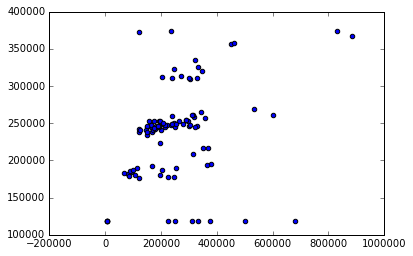

In [87]:
plt.scatter(test_y, predictions)

In [88]:
sklearn.metrics.r2_score(test_y, predictions)

0.1106800796775006

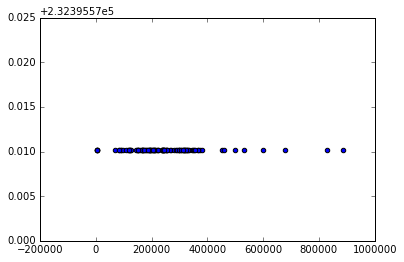

In [89]:
dummy = sklearn.dummy.DummyRegressor(strategy='mean')
dummy.fit(train_x[['beds', 'baths', 'sq__ft']], train_y)
dummy_predictions = dummy.predict(test_x[['beds', 'baths', 'sq__ft']])
plt.scatter(test_y, dummy_predictions)

In [90]:
sklearn.metrics.r2_score(test_y, dummy_predictions)

-0.014096338922008123

0.31149923117568723

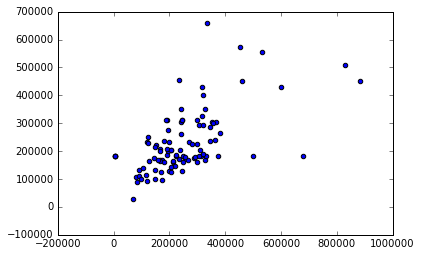

In [91]:
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(train_x[['beds', 'baths', 'sq__ft']], train_y)
tree_predictions = tree.predict(test_x[['beds', 'baths', 'sq__ft']])
plt.scatter(test_y, tree_predictions)
sklearn.metrics.r2_score(test_y, tree_predictions)

let's re-do some pre-processing

In [92]:
sac['zip_region'] = sac.zip / 10
sac['is_condo'] = sac.type == 'Condo'
sac['is_residential'] = sac.type == 'Residential'
columns = ['beds', 'baths', 'sq__ft', 'zip', 'zip_region', 'is_condo', 'is_residential', 'latitude', 'longitude']

# Cross Validation

In [93]:
train_test_split = sklearn.cross_validation.train_test_split

(train_x, test_x, train_y, test_y) = train_test_split(sac,
                                                      sac.price,
                                                      test_size=0.1)

0.31567903825732013

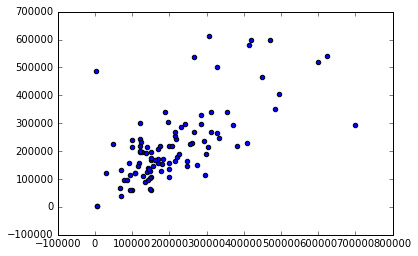

In [94]:
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(train_x[columns], train_y)
tree_predictions = tree.predict(test_x[columns])
plt.scatter(test_y, tree_predictions)
sklearn.metrics.r2_score(test_y, tree_predictions)

In [95]:
sklearn.metrics.median_absolute_error(test_y, tree_predictions)

47595.0

In [96]:
sklearn.metrics.mean_absolute_error(test_y, tree_predictions)

74436.444444444438

# Doing this analysis for real

#### Decision Tree

In [97]:
import sklearn.grid_search

In [98]:
params = {
    'max_depth': range(1,10),
    'max_features': [None,1,2,4]
}

tree = sklearn.tree.DecisionTreeRegressor()

searcher = sklearn.grid_search.GridSearchCV(tree, params, cv=10)
searcher.fit(sac[columns], sac.price)
searcher.best_score_

-0.62337577716746628

In [99]:
#sklearn.grid_search.GridSearchCV?

In [100]:
searcher.best_params_

{'max_depth': 5, 'max_features': 4}

In [101]:
searcher.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=4,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [102]:
FinalAnswerBestPredictor = sklearn.tree.DecisionTreeRegressor(max_depth=5, max_features=4)
FinalAnswerBestPredictor.fit(sac[columns], sac.price)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=4,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

#### Ransac Model

In [122]:
params = {
    'residual_threshold': range(100000,300000,5000),
    'max_trials': [100, 1000]
}

ransac = sklearn.linear_model.RANSACRegressor()
searcher = sklearn.grid_search.GridSearchCV(ransac, params, cv=10)
searcher.fit(sac[columns], sac.price)
searcher.best_score_

-2.2836006336065919

In [123]:
searcher.best_params_

{'max_trials': 1000, 'residual_threshold': 115000}

#### What are we really doing below?

In [125]:
two_samples = sac.sample(2)
predictions = searcher.best_estimator_.predict(two_samples[columns])
zip(two_samples.price, predictions)


[(254172, 238640.99317657948), (232500, 305331.87113144621)]

In [129]:
params = {
    'alpha': [0.1, 1.0, 100.0, 1000000, 10000000]
    
}

lasso = sklearn.linear_model.Lasso()
searcher = sklearn.grid_search.GridSearchCV(lasso, params, cv=10)
searcher.fit(sac[columns], sac.price)
searcher.best_score_

-0.87312425703695518

In [130]:
searcher.best_params_

{'alpha': 1000000}

In [131]:
zip(columns, searcher.best_estimator_.coef_)

[('beds', 0.0),
 ('baths', 0.0),
 ('sq__ft', 53.8726093430897),
 ('zip', -83.870601288039637),
 ('zip_region', -0.0),
 ('is_condo', -0.0),
 ('is_residential', 0.0),
 ('latitude', 0.0),
 ('longitude', 0.0)]

In [4]:
sac.sample?